# Forecasting of the "foie gras" searched on googled per month using a dummy model

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

In [2]:
warnings.filterwarnings("ignore")

## Data Loading

In [3]:
df = pd.read_csv('data/multiTimeline.csv', header=1)

In [4]:
df.columns = ['date', 'foie_gras']
df['date'] = pd.to_datetime(df.date)
df.set_index('date', inplace=True)

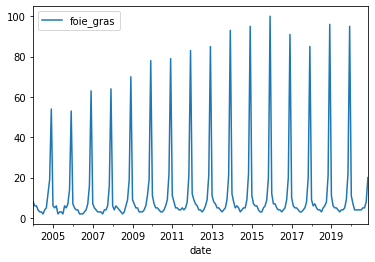

In [5]:
df.plot();

As we can see, there is a strong yearly seasonality. 

### Autocorrelation

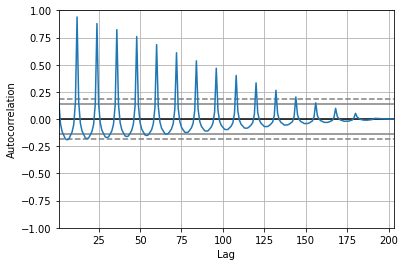

In [6]:
pd.plotting.autocorrelation_plot(df.foie_gras);

We can see the seasonality through the autororrelation plot.  

The seasonal peaks are very high (close to 1) which means that using the previous year's value will be really useful to predict the target.

### Dummy model

We're going to make a naive model using the data from 12 months ago as a prediction.

In [7]:
df_dummy = df.copy()
df_dummy['naive_prediction'] = df_dummy['foie_gras'].shift(12)
df_dummy.dropna(inplace=True)

In [9]:
size = int(len(df_dummy) * 0.66)
train, test = df_dummy[0:size], df_dummy[size:len(df_dummy)]

In [10]:
mse = mean_squared_error(test.foie_gras, test.naive_prediction)
mae = mean_absolute_error(test.foie_gras, test.naive_prediction)
r2 = r2_score(test.foie_gras, test.naive_prediction)
print(f'\n\t-> mse {mse}\n\t-> mae {mae}\n\t-> r2 {r2}')


	-> mse 4.923076923076923
	-> mae 1.1384615384615384
	-> r2 0.9910976434435


As we can see this naive prediction is **very** good, a r2 close to 1 and a MAE barely above 1. 

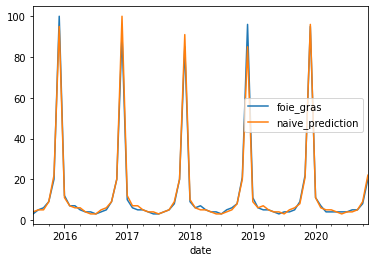

In [11]:
test[['foie_gras', 'naive_prediction']].plot()
plt.show()

On the figure above, we can see that the naive predictions are very close to reality. 